## Predicting housing prices

In [2]:
# Load the dataset into a dataframe using pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('dataset.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
# Get a sense of the size of the datasest
df.shape

(1460, 81)

In [4]:
# Summarize columns with missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis = 0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis = 1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending = False).round(1)
        print ("There are " + str(mz_table.shape[0]) + " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


### Data Cleaning

In [5]:
# Drop columns containing less than 60% non-null values
df.dropna(thresh = df.shape[0]*0.6, how = 'all', inplace = True, axis=1)
df.shape

(1460, 76)

MasVnrArea_median value =  0.0


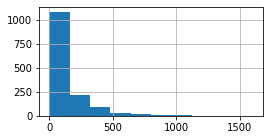

In [6]:
# Check the value distribution in MasVnrArea, which has 861 zero values.  
plt.figure(figsize=(4,2))
df['MasVnrArea'].hist()
print('MasVnrArea_median value = ', df['MasVnrArea'].median())

In [7]:
# Data in MasVnrArea column are largely zeros and unlikely to be useful.  Thus will be dropped.
df.drop(['MasVnrArea'], axis = 1, inplace = True)
missing_zero_values_table(df)

There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object


In [8]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [9]:
# Fill null values in LotFrontage column with the average value
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace = True)
df['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

The LotFrontage column has the most null value after dropping columns with more than 60% null values. Replacing NA values with the average did not change the mean for the column, thus it is a reasonable approach to preserve the column for later analysis.

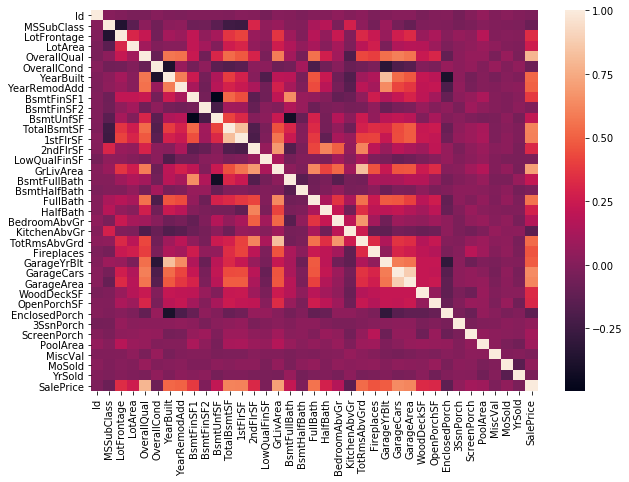

In [10]:
# Check correlations among columns
corr = df.corr()

# Plot heatmap for corr
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(corr)

In [16]:
# Find highly correlated columns
s = corr.unstack()
so = s.sort_values(ascending = False)
so[so!=1].head(15)

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
YearBuilt     GarageYrBlt     0.825667
GarageYrBlt   YearBuilt       0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
GrLivArea     SalePrice       0.708624
SalePrice     GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
GrLivArea     2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
dtype: float64

```Based on the values and description of the data, the first eight pairs are likely duplicate data. For example,
   GarageCars indicates the "Size of garage in car capacity" while GarageArea indicates the "Size of garage in square   feet", they are just different ways to measure the size of the garage.  
   The same is likely holds true for YearBuilt&GarageYrBlt, TotalBsmtSF&1stFlrSF, TotRmsAbvGrd&GrLivArea.  
   Continue down the list, 2ndFlrSF, BedroomAbvGr, BsmtFinSF1 are also likely to have similar information as their pairs.
   Based on this analysis, these columns will be dropped: ['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd',2ndFlrSF, BedroomAbvGr, BsmtFinSF1]. ```

In [ ]:
df = df.drop(['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1'], axis = 1)

In [19]:
# Check for missing values again
missing_zero_values_table(df)

There are 8 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object
BsmtFinType1,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object
Electrical,0,1,0.1,1,0.1,object


In [ ]:
"""Among the four columns related to Garage that still have missing values, "GarageType" refers to the Garage 
   location, "GarageFinish" refers to the Interior finish of the garage, "GarageQual" refers to Garage quality,
   "GarageCond" refers to Garage condition.  It seems that "GarageCond" should be a sufficient parameter to evalute 
   the garage condition. """

df = df.drop(['GarageType', 'GarageFinish', 'GarageQual'], axis = 1)

In [21]:
""" Among the five columns related to basement that still have missing values, "BsmtExposure" refers to walkout or 
    garden level walls, "BsmtFinType2" is the rating of basement finished area (if multiple types), "BsmtQual" 
    evaluates the height of the basement, "BsmtCond" evaluates the general condition of the basement, 
    "BsmtFinType1" is the rating of basement finished area.  It seems that "BsmtCond" should be a sufficient 
    parameter to evalute the basement condition. """

df = df.drop(['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1'], axis = 1)

In [22]:
# Check for missing values again
missing_zero_values_table(df)

There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageCond,0,81,5.5,81,5.5,object
BsmtCond,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object
Electrical,0,1,0.1,1,0.1,object


Since the total missing values now only comprised of less than 10% of the total data, I decided to preserve the features and drop the rows containing missing values.

In [135]:
df.dropna(inplace = True)

In [136]:
# Check for missing values
missing_zero_values_table(df)

There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [137]:
# check the size of the dataframe
df.shape

(1340, 61)

#### There are still has 61 potential features.  Check for other potential columns to drop

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 61 columns):
Id               1340 non-null int64
MSSubClass       1340 non-null int64
MSZoning         1340 non-null object
LotFrontage      1340 non-null float64
LotArea          1340 non-null int64
Street           1340 non-null object
LotShape         1340 non-null object
LandContour      1340 non-null object
Utilities        1340 non-null object
LotConfig        1340 non-null object
LandSlope        1340 non-null object
Neighborhood     1340 non-null object
Condition1       1340 non-null object
Condition2       1340 non-null object
BldgType         1340 non-null object
HouseStyle       1340 non-null object
OverallQual      1340 non-null int64
OverallCond      1340 non-null int64
YearBuilt        1340 non-null int64
YearRemodAdd     1340 non-null int64
RoofStyle        1340 non-null object
RoofMatl         1340 non-null object
Exterior1st      1340 non-null object
Exterior2nd      1340 non

I decided to hand pick potential useful features and exclude features that may contain reducant information based on the data description.  I will also exclude features that are not likely to be important for home buyers based on my own intuiation.

In [23]:
# choose columns to keep
s_col = ['MSSubClass', 'MSZoning','LotFrontage','LotArea','LandSlope','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','BsmtCond','GrLivArea','FullBath','HalfBath','KitchenQual','Fireplaces','GarageArea','GarageCond','YrSold', 'SalePrice']
df = df[s_col]
print(df.shape)

(1460, 19)


### Data transformation

YearBuilt, YearRemodAdd and YrSold alone are not as useful.  It's better to make a new column with information on
the age of the house.  If it is remodeled, the age will be calculated as from the year it was remodeled to the 
year it was sold.  

In [24]:
# Check to make sure that the dates make sense. 
c = df['YearRemodAdd'] >= df['YearBuilt']
c.value_counts()

True    1460
dtype: int64

In [25]:
# Create the new HouseAge column based on YearRemodAdd and YrSold
c = df['YearRemodAdd'] - df['YearBuilt']
df['HouseAge'] = c
df = df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1)
df.shape

(1460, 17)

In [27]:
# Check feature correlations with SalePrice
corr = df.corr()
corr['SalePrice'].abs().sort_values(ascending = False)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
FullBath       0.560664
Fireplaces     0.466929
LotFrontage    0.334901
HalfBath       0.284108
LotArea        0.263843
HouseAge       0.217503
MSSubClass     0.084284
Name: SalePrice, dtype: float64

In [ ]:
# MSSubClass is poorly correlated with SalePrice, will drop it
df = df.drop(['MSSubClass'], axis = 1)

### Transforming categorical variables

In [144]:
# Learn about the non-numeric variables
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LandSlope', 'Neighborhood', 'BsmtCond', 'KitchenQual',
       'GarageCond'],
      dtype='object')

In [145]:
df['MSZoning'].value_counts()

RL         1068
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [146]:
df['LandSlope'].value_counts()

Gtl    1267
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [30]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [31]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [32]:
df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [33]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

I am not familiar with the neighborhood designations and I don't have a good reference on hand to categorize them in a reasonable way in relation to housing market.  Therefore, it will be dropped.

In [34]:
df = df.drop(['Neighborhood'], axis = 1)

In [35]:
# Change string data type to categorical values
t_cols = ['MSZoning','LandSlope','BsmtCond','KitchenQual','GarageCond']
for col in t_cols:
    print(col+":", len(df[col].unique()))
    df[col] = df[col].astype('category')

MSZoning: 5
LandSlope: 3
BsmtCond: 5
KitchenQual: 4
GarageCond: 6


In [36]:
# Create dummy variable for the text columns
for col in t_cols:
    col_dummies = pd.get_dummies(df[col]).rename(columns = lambda x: col + str(x))
    df = pd.concat([df, col_dummies], axis=1)
    del df[col]

In [37]:
# Check correlation again
corr = df.corr()
cor = corr['SalePrice'].abs().sort_values(ascending = False)
cor

SalePrice          1.000000
OverallQual        0.790982
GrLivArea          0.708624
GarageArea         0.623431
FullBath           0.560664
KitchenQualTA      0.519298
KitchenQualEx      0.504094
Fireplaces         0.466929
LotFrontage        0.334901
KitchenQualGd      0.321641
MSZoningRM         0.288065
HalfBath           0.284108
GarageCondTA       0.275872
LotArea            0.263843
MSZoningRL         0.245063
HouseAge           0.217503
KitchenQualFa      0.157199
BsmtCondFa         0.132739
GarageCondFa       0.130774
MSZoningC (all)    0.111257
BsmtCondTA         0.101275
MSZoningFV         0.089950
BsmtCondGd         0.088824
MSZoningRH         0.065429
GarageCondPo       0.063296
BsmtCondPo         0.054529
LandSlopeGtl       0.051116
LandSlopeMod       0.042981
LandSlopeSev       0.027998
GarageCondEx       0.026546
GarageCondGd       0.000983
Name: SalePrice, dtype: float64

In [38]:
# Drop columns having a correlation coefficient less than 0.2
ci = cor[cor >= 0.2].index
df = df[ci]
df.head(3)

,SalePrice,OverallQual,GrLivArea,GarageArea,FullBath,KitchenQualTA,KitchenQualEx,Fireplaces,LotFrontage,KitchenQualGd,MSZoningRM,HalfBath,GarageCondTA,LotArea,MSZoningRL,HouseAge
0,208500,7,1710,548,2,0,0,0,65.0,1,0,1,1,8450,1,0
1,181500,6,1262,460,2,1,0,1,80.0,0,0,0,1,9600,1,0
2,223500,7,1786,608,2,0,0,1,68.0,1,0,1,1,11250,1,1


## Model selection
Because there are several columns that are highly correlated with the SalePrice and because SalePrice is a continous variable, I decided to fisr employ a linear regression model to predict SalePrice.  

Text(0, 0.5, 'KitchenQualGd')

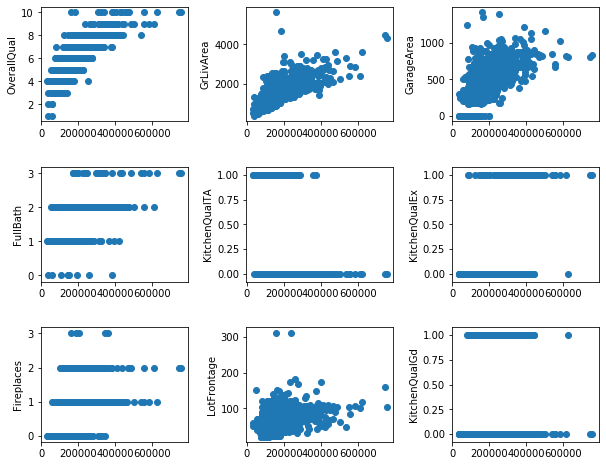

In [39]:
# Visulize the relationship between SalePrice and top nine correlated columns to get a sense of the data.
fig = plt.figure(figsize = (10,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(3, 3, 1)
ax1.scatter(df['SalePrice'], df['OverallQual'])
ax1.set_ylabel('OverallQual')

ax2 = fig.add_subplot(3, 3, 2)
ax2.scatter(df['SalePrice'],df['GrLivArea'])
ax2.set_ylabel('GrLivArea')

ax3 = fig.add_subplot(3, 3, 3)
ax3.scatter(df['SalePrice'],df['GarageArea'])
ax3.set_ylabel('GarageArea')

ax4 = fig.add_subplot(3, 3, 4)
ax4.scatter(df['SalePrice'],df['FullBath'])
ax4.set_ylabel('FullBath')

ax5 = fig.add_subplot(3, 3, 5)
ax5.scatter(df['SalePrice'],df['KitchenQualTA'])
ax5.set_ylabel('KitchenQualTA')

ax6 = fig.add_subplot(3, 3, 6)
ax6.scatter(df['SalePrice'],df['KitchenQualEx'])
ax6.set_ylabel('KitchenQualEx')

ax7 = fig.add_subplot(3, 3, 7)
ax7.scatter(df['SalePrice'],df['Fireplaces'])
ax7.set_ylabel('Fireplaces')

ax8 = fig.add_subplot(3, 3, 8)
ax8.scatter(df['SalePrice'],df['LotFrontage'])
ax8.set_ylabel('LotFrontage')

ax9 = fig.add_subplot(3, 3, 9)
ax9.scatter(df['SalePrice'],df['KitchenQualGd'])
ax9.set_ylabel('KitchenQualGd')

As seen above, there are only four columns that exhibit somewhat reasonable linear relationship with  SalePrice, namely, OverallQual, GrLivArea, GarageArea and LotFrontage.  With a stretch of imagination, one might argue that FullBath, KitchenQualEx and even Fireplaces also show a linear trend, but in my opinion, these data are way too noisy and they are being more clustered than being linear.  I will first attempt to use columns ['OverallQual', 'GrLivArea', 'GarageArea', 'LotFrontage'] to train a linear model.

In [46]:
# write a function for train and testing models
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def train_and_test(train, features):
    """ This function trains a model based on a set of given features using a train data set. 
    It returns the rmse. """
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [40]:
cor[0:10]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
FullBath         0.560664
KitchenQualTA    0.519298
KitchenQualEx    0.504094
Fireplaces       0.466929
LotFrontage      0.334901
KitchenQualGd    0.321641
Name: SalePrice, dtype: float64

Number of features use: 1 ,   rmse: 53651.05
Number of features use: 2 ,   rmse: 47159.88
Number of features use: 3 ,   rmse: 44647.06
Number of features use: 4 ,   rmse: 44646.52
Number of features use: 5 ,   rmse: 44305.19
Number of features use: 6 ,   rmse: 41856.25
Number of features use: 7 ,   rmse: 40992.08
Number of features use: 8 ,   rmse: 40912.16
Number of features use: 9 ,   rmse: 40942.75


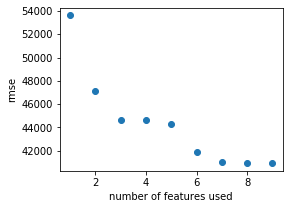

In [81]:
# Use top nine features to train the model.  Features will be added sequentially with each iteration. 
features = ['OverallQual','GrLivArea','GarageArea','FullBath','KitchenQualTA','KitchenQualEx','Fireplaces','LotFrontage','KitchenQualGd']

# Ranomize and split data to train and test data sets
from sklearn.utils import shuffle

df = shuffle(df)
df.reset_index(inplace = True, drop = True)

# Arbitrarily split data into train and test data sets based on 75:25 traian:test split.
sp = int(df.shape[0]*0.75)
train = df[:sp]
test = df[sp:]

rmses = {}
for i in range(1,len(features)+1):
    t_col = features[0:i]
    rmse = train_and_test(train,t_col)
    rmse = round(rmse,2)
    rmses[i] = rmse
    print('Number of features use:',i, ',  ', 'rmse:', rmse)
    
# converting the rmses dictionary to a dataframe
rms = pd.DataFrame(list(rmses.items()), columns = ['n_cols', 'rmse'])

# plot the rmses verses the corresponsing number of features
plt.figure(figsize =(4,3))
plt.xlabel('number of features used')
plt.ylabel('rmse')
plt.scatter(x = rms['n_cols'], y = rms['rmse'])

It can be seen from above graph that the prediction error decreases as more features are included for training.  The error reached a local minimun with three features, then another one with seven features. 

It should also be noted that although data were randomized before training, it is not clear whether there might be potential bias in the data.  Therefore, k-fold cross-validation method is used below to test how changing the training sets affects the error.  

Text(0.5, 0, 'folds split')

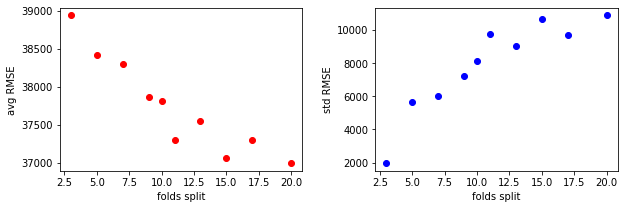

In [57]:
# Testing differnt ways to split the train and test data
from sklearn.model_selection import cross_val_score, KFold
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 20]
rmses_ls = []
std_rmse_ls = []
for fold in num_folds:
    kf = KFold(fold, shuffle = True, random_state = 1)
    lr = linear_model.LinearRegression()
    mses = cross_val_score(lr, df[features], df['SalePrice'], scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    rmses_ls.append(avg_rmse)
    std_rmse = np.std(rmses)
    std_rmse_ls.append(std_rmse)
    
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(num_folds, rmses_ls, color = 'red', label='avg_rmse')
ax1.set_ylabel('avg RMSE')
ax1.set_xlabel('folds split')
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(num_folds, std_rmse_ls, color = 'blue', label='std_rmse')
ax2.set_ylabel('std RMSE')
ax2.set_xlabel('folds split')

As the number of splits increases, the prediction error decreases, but the standard deviation for the errors increases, suggesting notable variance in data.  Given this conundrum, I will experiment by both varying the fraction of data used for training and adding more features during training to further tune the model.  As shown below, each model will be run multiple times to deterime the effects of data selection on model prediction. Data are randomized each time before fitting the model. 

In [60]:
# To increase the workflow, a train_test_graph function is defined below.  

def train_test_graph(df, features, k, n):
    """ This function trains a model based on a set of given features, then plots the model parameters and rmses 
    for each model.  It will automatically train the model n times.  The data are randomized for each run.  
    k is the fraction of data for training. """
    rmses =[] # record rmse for the runs
    a0s = [] # record intercept for the runs
    ais = [] # record slopes for the runs
       
    for i in range(0,n):
        # ranmize and split data
        df = shuffle(df)
        df.reset_index(inplace = True, drop = True)
        sp = int(df.shape[0]*k)
        train = df[:sp]
        test = df[sp:]
        
        # model fitting and prediction
        lr = linear_model.LinearRegression()
        lr.fit(train[feature7], train['SalePrice'])
                        
        # calculating the error
        mse = mean_squared_error(test['SalePrice'], predictions)
        rmse = np.sqrt(mse)
        rmse = round(rmse,1)
        rmses.append(rmse)
        
        # retrieving the fitting parameters
        a0 = lr.intercept_
        a0s.append(a0)
        ai = lr.coef_
        ais.append(ai)
    
    # graph the results
    fig = plt.figure(figsize = (18,3))
    fig.subplots_adjust(wspace = 0.5)
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(rmses)
    ax1.set_ylabel('rmses')
    ax1.set_xlabel('runs')
    
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(a0s)
    ax2.set_ylabel('a0')
    ax2.set_xlabel('runs')
    
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.plot(ais)
    ax3.set_ylabel('ai')
    ax3.set_xlabel('runs')
    
    return rmses

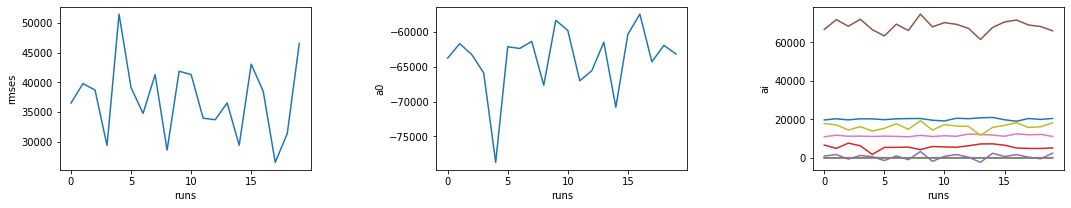

In [61]:
# Exp1. Use three features and the train:test split of 90:10 to train the model 20 times
feature3 = features[0:3]
rmses = train_test_graph(df, feature3, 0.9, 20)
max_rmse1 = max(rmses)
min_rmse1 = min(rmses)

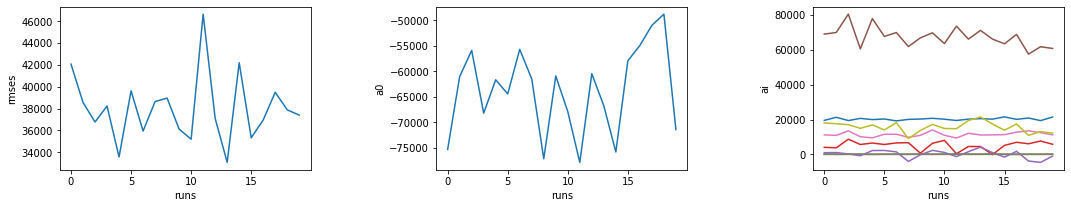

In [62]:
# Exp2. Use three features but change the train:test split to 70:30 to train the model 20 times
rmses = train_test_graph(df, feature3, 0.7, 20)
max_rmse2 = max(rmses)
min_rmse2 = min(rmses)

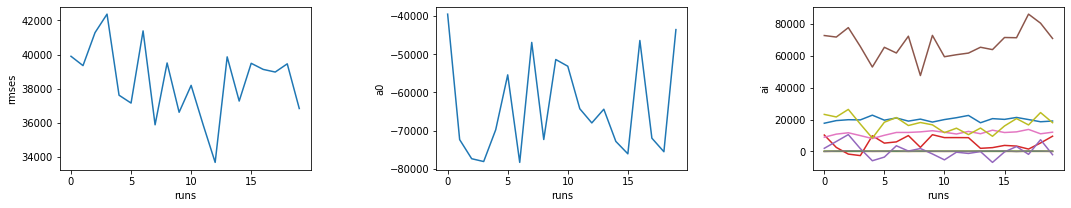

In [63]:
# Exp3. Use three features but change the train:test split to 50:50 to train the model 20 times
rmses = train_test_graph(df, feature3, 0.5, 20)
max_rmse3 = max(rmses)
min_rmse3 = min(rmses)

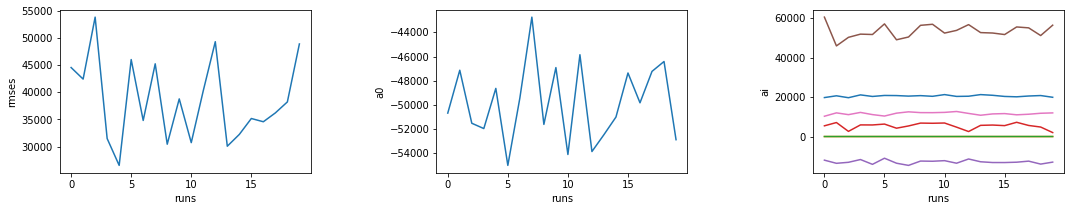

In [85]:
# Exp4. Use severn features and train:test split of 90:10 to train the model 20 times
feature7 = features[0:7]
rmses = train_test_graph(df, feature7, 0.9, 20)
max_rmse4 = max(rmses)
min_rmse4 = min(rmses)

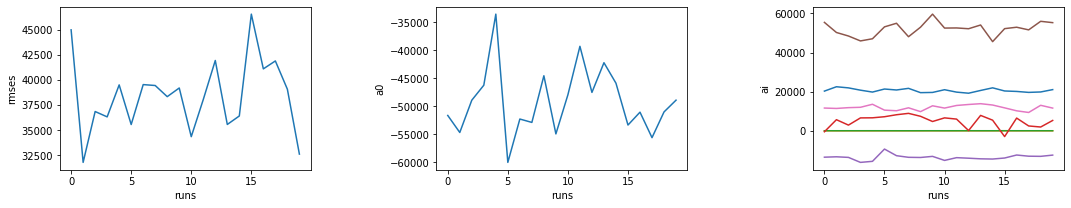

In [86]:
# Exp5.  Use severn features and train:test split of 70:30 to train the model 20 times
rmses = train_test_graph(df, feature7, 0.7, 20)
max_rmse5 = max(rmses)
min_rmse5 = min(rmses)

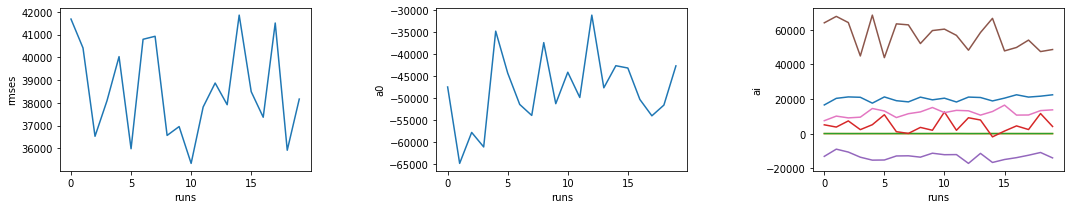

In [87]:
# Exp6.  Use severn features and train:test split of 50:50 to train the model 20 times
rmses = train_test_graph(df, feature7, 0.5, 20)
max_rmse6 = max(rmses)
min_rmse6 = min(rmses)

In [88]:
# Experimental summary

feature_split = ['3_90','3_70','3_50','7_90','7_70','7_50']
max_rmse = [max_rmse1, max_rmse2, max_rmse3, max_rmse4, max_rmse5, max_rmse6]
min_rmse = [min_rmse1, min_rmse2, min_rmse3, min_rmse4, min_rmse5, min_rmse6]

sum_table = pd.DataFrame(list(zip(feature_split, max_rmse, min_rmse)), 
               columns =['feature_split','max_rmse','min_rmse'])
sum_table['Delta'] = sum_table['max_rmse'] - sum_table['min_rmse']
sum_table

,feature_split,max_rmse,min_rmse,Delta
0,3_90,51491.6,26483.6,25008.0
1,3_70,46643.1,33070.0,13573.1
2,3_50,42370.6,33677.0,8693.6
3,7_90,53894.3,26517.8,27376.5
4,7_70,46559.2,31779.6,14779.6
5,7_50,41857.3,35339.0,6518.3


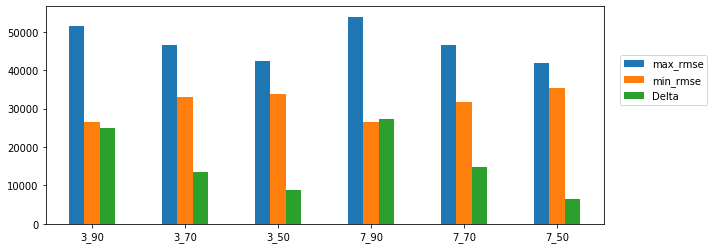

In [89]:
# Graphical representation of the summary data
ax = sum_table.plot.bar(xticks = sum_table.index, rot = 0, figsize = (10,4))
ax.set_xticklabels(sum_table.feature_split)
plt.legend(bbox_to_anchor = (1.02, 0.8), loc = 2)

Based on the above analysis, using 50:50 split resulted in more consistent errors between runs.  In the next segment, I will use a new train_test function and the same 50:50 split data set to test how error changes with increasing features. 

In [91]:
# Prepare data
df = shuffle(df)
df.reset_index(inplace = True, drop = True)
sp = int(df.shape[0]*0.5)
train = df[:sp]
test = df[sp:]

# Define a new train_test function that will return rmse, fitting parameter values and predicted values
def train_test(train, features):  
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    a0 = lr.intercept_
    ai = lr.coef_
    return rmse, a0, ai, predictions

rmses:  [48981.8, 42876.4, 42143.6, 42151.0, 41717.8, 40573.8, 40400.7]
a0s:  [-89124.9, -100364.9, -90913.1, -90850.1, -65672.1, -42268.7, -33338.4]
ais:  [[44133.7], [32100.0, 55.9], [25613.0, 48.8, 87.5], [25655.8, 49.0, 87.6, -428.6], [23160.1, 50.5, 85.8, -3401.0, -13933.8], [18968.3, 46.3, 80.3, 1206.8, -13412.2, 64330.5], [17158.5, 39.8, 79.2, 3962.7, -14583.8, 65145.4, 14106.9]]


Text(0, 0.5, 'rmse')

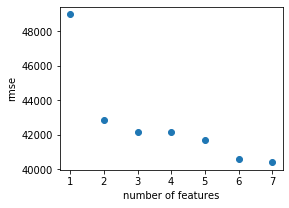

In [93]:
rmses = []
a0s = []
ais = []
prediction_ls =[]

for i in range(1,len(feature7)+1):
    t_col = feature7[0:i]
    rmse, a0, ai, predictions = train_test(train,t_col)
    rmses.append(round(rmse,1))
    a0s.append(round(a0,1))
    ai = [round(x,1) for x in ai]
    ais.append(ai)
    prediction_ls.append(predictions)
    
print('rmses: ', rmses)
print('a0s: ', a0s)
print('ais: ', ais)
plt.figure(figsize = (4,3))
plt.scatter([1,2,3,4,5,6,7], rmses)
plt.xticks(np.arange(1, 8, 1)) 
plt.xlabel('number of features')
plt.ylabel('rmse')

Based on the above analysis, I will use 50:50 split and three and sever features to further validate the model.  

In [94]:
# Parameters predicted in the final model using three features
te_a0 = a0s[2]
te_ai = ais[2]
te_rmse = rmses[2]
print('rmse: ', te_rmse)

rmse:  42143.6


In [107]:
# Predict training data using three features
lr = linear_model.LinearRegression()
lr.fit(train[feature3], train['SalePrice'])
predictions = lr.predict(train[feature3])
mse = mean_squared_error(train['SalePrice'], predictions)
tr_rmse = np.sqrt(mse)
tr_a0 = lr.intercept_
tr_ai = lr.coef_
print('rmse: ', tr_rmse)

rmse:  35349.93823680579


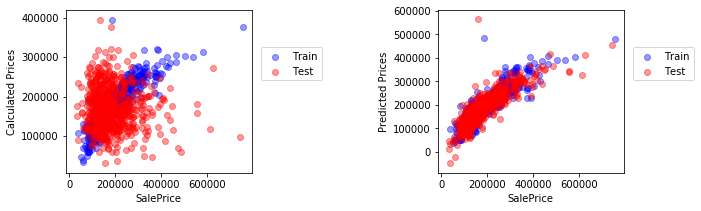

In [118]:
# Calculate the predicted price for training and testing data
cal_train = tr_a0 + tr_ai[0]*train['OverallQual'] + tr_ai[1]*train['GrLivArea'] + tr_ai[2]*train['GarageArea']
cal_test = te_a0 + te_ai[0]*train['OverallQual'] + te_ai[1]*train['GrLivArea'] + te_ai[2]*train['GarageArea'] 

# Plot calculated prices in respect to actual SalePrice
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(wspace = 1)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x = train['SalePrice'], y = cal_train, color = 'blue', label='Train', alpha = 0.4)
ax1.scatter(x = test['SalePrice'], y = cal_test, color = 'red', label='Test', alpha = 0.4)
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('Calculated Prices')
ax1.legend(bbox_to_anchor = (1.02, 0.8), loc = 2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x = train['SalePrice'], y = predictions, color = 'blue', label='Train', alpha = 0.4)
ax2.scatter(x = test['SalePrice'], y = prediction_ls[2], color = 'red', label='Test', alpha = 0.4)
ax2.set_xlabel('SalePrice')
ax2.set_ylabel('Predicted Prices')
ax2.legend(bbox_to_anchor = (1.02, 0.8), loc = 2)

#### Testing using seven features

In [114]:
# Parameters predicted in the final model using seven features
te_a0 = a0s[6]
te_ai = ais[6]
te_rmse = rmses[6]
print('rmse: ', te_rmse)

rmse:  40400.7


In [116]:
# Predict training data using seven features
lr = linear_model.LinearRegression()
lr.fit(train[feature7], train['SalePrice'])
predictions = lr.predict(train[feature7])
mse = mean_squared_error(train['SalePrice'], predictions)
tr_rmse = np.sqrt(mse)
tr_a0 = lr.intercept_
tr_ai = lr.coef_
print('rmse: ', tr_rmse)

rmse:  35349.93823680579


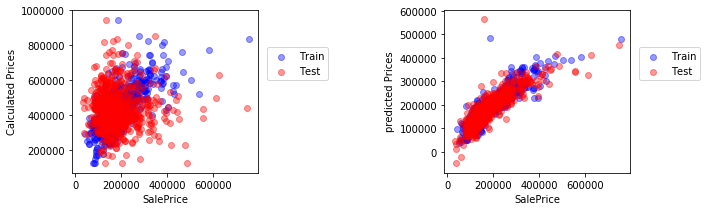

In [117]:
# Calculate the predicted price for training and testing data
cal_train = tr_a0 + tr_ai[0]*train['OverallQual'] + tr_ai[1]*train['GrLivArea'] + tr_ai[2]*train['GarageArea'] + tr_ai[3]*train['LotFrontage'] + tr_ai[4]*train['FullBath'] + tr_ai[5]*train['KitchenQualEx'] + tr_ai[6]*train['Fireplaces']
cal_test = te_a0 + te_ai[0]*train['OverallQual'] + te_ai[1]*train['GrLivArea'] + te_ai[2]*train['GarageArea'] + te_ai[3]*train['LotFrontage'] + te_ai[4]*train['FullBath'] + te_ai[5]*train['KitchenQualEx'] + te_ai[6]*train['Fireplaces']

# Plot calculated prices in respect to actual SalePrice
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(wspace = 1)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x = train['SalePrice'], y = cal_train, color = 'blue', label='Train', alpha = 0.4)
ax1.scatter(x = test['SalePrice'], y = cal_test, color = 'red', label='Test', alpha = 0.4)
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('Calculated Prices')
ax1.legend(bbox_to_anchor = (1.02, 0.8), loc = 2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x = train['SalePrice'], y = predictions, color = 'blue', label='Train', alpha = 0.4)
ax2.scatter(x = test['SalePrice'], y = prediction_ls[2], color = 'red', label='Test', alpha = 0.4)
ax2.set_xlabel('SalePrice')
ax2.set_ylabel('Predicted Prices')
ax2.legend(bbox_to_anchor = (1.02, 0.8), loc = 2)

In [180]:
df['SalePrice'].describe()

count      1340.000000
mean     186838.630597
std       78899.771325
min       35311.000000
25%      135000.000000
50%      168750.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- I initially used a linear regression model because the SalePrice is a continuous variable and there are reseable correlation between some of the features and SalePrice.
    
    
- I selected the features for prediction based on the correlation coefficients between these feaures and the SalePrice.  I also used intuition to remove some of the non-nemerical features that I don't think to be very useful for predictions.
    
    Training this model was hindered by the fact that the variance among data is notable.  After experimenting with changing the number of features used and the way to split data, I concluded that the model trained with three features and a 50:50 split gives more consistent predictions with less error. 
    
    
- The model did not perform well as judged by the magnitude of the erros.  The minimun error from the last run is close to the minimun actual SalePrice.

### Prediction using decision tree

In [181]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
def dt_train_test(train, features):
    reg = DecisionTreeRegressor(min_samples_leaf=5)
    reg.fit(train[features], train['SalePrice'])
    predictions = reg.predict(test[features])
    mse = np.mean((predictions - test['SalePrice']) ** 2)
    rmse = mse**0.5
    return rmse

rmses =[]
scores = []
for i in range(3,len(features)+1):
    t_col = features[0:i]
    rmse = dt_train_test(train,t_col)
    rmse = round(rmse,1)
    rmses.append(rmse)
    score = round(score,1)
    scores.append(score)
    print("rmses using features: ", (i,rmses))
    print("scores using features: ", (i,scores), '\n')

rmses using features:  (3, [40466.1])
scores using features:  (3, [0.9]) 

rmses using features:  (4, [40466.1, 40159.3])
scores using features:  (4, [0.9, 0.9]) 

rmses using features:  (5, [40466.1, 40159.3, 40145.9])
scores using features:  (5, [0.9, 0.9, 0.9]) 

rmses using features:  (6, [40466.1, 40159.3, 40145.9, 40145.9])
scores using features:  (6, [0.9, 0.9, 0.9, 0.9]) 

rmses using features:  (7, [40466.1, 40159.3, 40145.9, 40145.9, 39821.2])
scores using features:  (7, [0.9, 0.9, 0.9, 0.9, 0.9]) 



### Prediction using random forest

In [198]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestRegressor
def rf_train_test(train, features, n):
    reg = RandomForestRegressor(n_estimators=n,min_samples_leaf=5)
    reg.fit(train[features], train['SalePrice'])
    predictions = reg.predict(test[features])
    mse = np.mean((predictions - test['SalePrice']) ** 2)
    rmse = mse**0.5
    score = reg.score(train[features], train['SalePrice'])
    return rmse, score, predictions

rmses =[] 
scores = []
pred=[]
for i in range(3,len(features)+1):
    t_col = features[0:i]
    rmse, score, predictions = rf_train_test(train,t_col,10)
    rmse = round(rmse,1)
    rmses.append(rmse)
    score = round(score, 1)
    scores.append(score)
    pred.append(predictions)
    print("rmses using features: ", (i,rmses))
    print("scores using features: ", (i,scores), '\n')

rmses using features:  (3, [36765.2])
scores using features:  (3, [0.8]) 

rmses using features:  (4, [36765.2, 36211.3])
scores using features:  (4, [0.8, 0.8]) 

rmses using features:  (5, [36765.2, 36211.3, 35958.1])
scores using features:  (5, [0.8, 0.8, 0.8]) 

rmses using features:  (6, [36765.2, 36211.3, 35958.1, 36488.6])
scores using features:  (6, [0.8, 0.8, 0.8, 0.8]) 

rmses using features:  (7, [36765.2, 36211.3, 35958.1, 36488.6, 35464.0])
scores using features:  (7, [0.8, 0.8, 0.8, 0.8, 0.8]) 



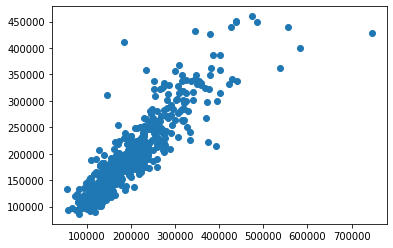

In [199]:
plt.scatter(test['SalePrice'], pred[-1])

In [203]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestRegressor
def rf_train_test(train, features, n):
    reg = RandomForestRegressor(n_estimators=n,min_samples_leaf=5)
    reg.fit(train[features], train['SalePrice'])
    predictions = reg.predict(test[features])
    mse = np.mean((predictions - test['SalePrice']) ** 2)
    rmse = mse**0.5
    score = reg.score(train[features], train['SalePrice'])
    return rmse, score, predictions

rmses =[] 
scores = []
pred2 =[]
for i in range(3,len(features)+1):
    t_col = features[0:i]
    rmse,score, predictions = rf_train_test(train,t_col,100)
    rmse = round(rmse,1)
    rmses.append(rmse)
    score = round(score, 1)
    scores.append(score)
    pred2.append(predictions)
    print("rmses using features: ", (i,rmses))
    print("scores using features: ", (i,scores), '\n')

rmses using features:  (3, [36416.8])
scores using features:  (3, [0.8]) 

rmses using features:  (4, [36416.8, 36137.4])
scores using features:  (4, [0.8, 0.8]) 

rmses using features:  (5, [36416.8, 36137.4, 35889.6])
scores using features:  (5, [0.8, 0.8, 0.8]) 

rmses using features:  (6, [36416.8, 36137.4, 35889.6, 35692.2])
scores using features:  (6, [0.8, 0.8, 0.8, 0.8]) 

rmses using features:  (7, [36416.8, 36137.4, 35889.6, 35692.2, 35132.3])
scores using features:  (7, [0.8, 0.8, 0.8, 0.8, 0.9]) 



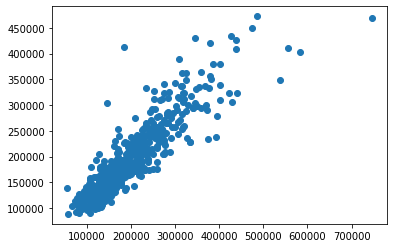

In [204]:
plt.scatter(test['SalePrice'], pred2[-1])